In [6]:
import os
os.listdir()

['home',
 'usr',
 'bin',
 'sbin',
 '.file',
 'etc',
 'var',
 'Library',
 'System',
 '.VolumeIcon.icns',
 'private',
 '.vol',
 'Users',
 'Applications',
 'opt',
 'dev',
 'Volumes',
 'tmp',
 'cores']

In [12]:
!pip install pandas datetime numpy matplotlib seaborn scipy


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   energy  1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


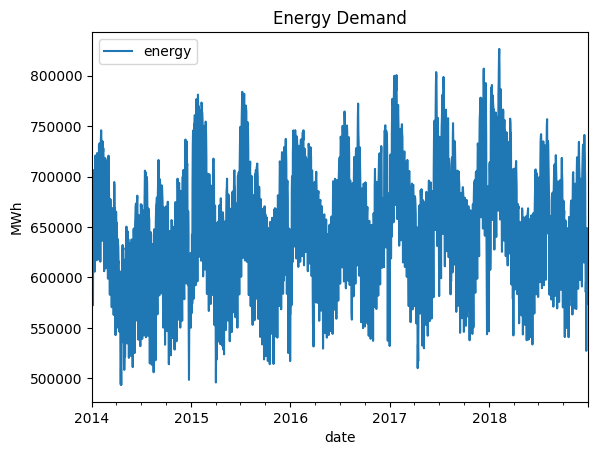

1826

In [16]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro

# Define the path to the data file
path = "/Users/syedmohathashimali/Downloads/spain_energy_market.csv"
# Read the data from the csv file
data = pd.read_csv(path, sep="," , parse_dates=["datetime"])

# Filter the data to only include the "Demanda programada PBF total" name
# Create a new column "date" that contains only the date portion of the datetime index
# Set the index to be the "date" column
data = data[data["name"] == "Demanda programada PBF total"]  # .set_index("datetime")
data["date"] = data["datetime"].dt.date
data.set_index("date", inplace=True)
data = data[["value"]]
data = data.asfreq("D")
data = data.rename(columns={"value": "energy"})
data.info()
data[:5]

data.plot(title="Energy Demand")
plt.ylabel("MWh")
plt.show()
len(pd.date_range(start="2014-01-01", end="2018-12-31"))